In [ ]:
import sqlite3
import pandas as pd
import seaborn as sns
import re

In [ ]:
dbfile = "data/chinook.db"
conn = sqlite3.connect(dbfile)
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(f"Table Name : {cursor.fetchall()}")

Table Name : [('albums',), ('sqlite_sequence',), ('artists',), ('customers',), ('employees',), ('genres',), ('invoices',), ('invoice_items',), ('media_types',), ('playlists',), ('playlist_track',), ('tracks',), ('sqlite_stat1',)]


In [ ]:
result = [a for a in cursor.execute("SELECT COUNT(*) as total, SUM(CASE WHEN Composer is NULL THEN 1 ELSE 0 END) as nullable FROM tracks")]
print(result)

[(3503, 978)]


In [ ]:
result = [a for a in cursor.execute("SELECT Name, AlbumId, MediaTypeId, GenreId, Composer, Milliseconds, Bytes, UnitPrice \
                                        FROM tracks \
                                        WHERE Milliseconds > 200000")]
print(len(result))

2749


In [ ]:
for row in result:
    print(row)

('For Those About To Rock (We Salute You)', 1, 1, 1, 'Angus Young, Malcolm Young, Brian Johnson', 343719, 11170334, 0.99)
('Balls to the Wall', 2, 2, 1, None, 342562, 5510424, 0.99)
('Fast As a Shark', 3, 2, 1, 'F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman', 230619, 3990994, 0.99)
('Restless and Wild', 3, 2, 1, 'F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman', 252051, 4331779, 0.99)
('Princess of the Dawn', 3, 2, 1, 'Deaffy & R.A. Smith-Diesel', 375418, 6290521, 0.99)
('Put The Finger On You', 1, 1, 1, 'Angus Young, Malcolm Young, Brian Johnson', 205662, 6713451, 0.99)
("Let's Get It Up", 1, 1, 1, 'Angus Young, Malcolm Young, Brian Johnson', 233926, 7636561, 0.99)
('Inject The Venom', 1, 1, 1, 'Angus Young, Malcolm Young, Brian Johnson', 210834, 6852860, 0.99)
('Snowballed', 1, 1, 1, 'Angus Young, Malcolm Young, Brian Johnson', 203102, 6599424, 0.99)
('Evil Walks', 1, 1, 1, 'Angus Young, Malcolm Young, Brian Johnson', 263497, 8611245, 0.99)
('Breaking The

In [ ]:
result = [a for a in cursor.execute("SELECT Name, MediaTypeId, GenreId, Composer, Milliseconds, Bytes, UnitPrice, Title as AlbumName \
                                     FROM \
                                       (SELECT Name, AlbumId, MediaTypeId, GenreId, Composer, Milliseconds, Bytes, UnitPrice \
                                        FROM tracks \
                                        WHERE Milliseconds > 200000) as a \
                                     JOIN \
                                       (SELECT * \
                                        FROM albums) as b \
                                     ON a.AlbumId == b.AlbumId \
                                     ")
         ]
print(len(result))

2749


In [ ]:
for row in result:
    print(row)

('For Those About To Rock (We Salute You)', 1, 1, 'Angus Young, Malcolm Young, Brian Johnson', 343719, 11170334, 0.99, 'For Those About To Rock We Salute You')
('Put The Finger On You', 1, 1, 'Angus Young, Malcolm Young, Brian Johnson', 205662, 6713451, 0.99, 'For Those About To Rock We Salute You')
("Let's Get It Up", 1, 1, 'Angus Young, Malcolm Young, Brian Johnson', 233926, 7636561, 0.99, 'For Those About To Rock We Salute You')
('Inject The Venom', 1, 1, 'Angus Young, Malcolm Young, Brian Johnson', 210834, 6852860, 0.99, 'For Those About To Rock We Salute You')
('Snowballed', 1, 1, 'Angus Young, Malcolm Young, Brian Johnson', 203102, 6599424, 0.99, 'For Those About To Rock We Salute You')
('Evil Walks', 1, 1, 'Angus Young, Malcolm Young, Brian Johnson', 263497, 8611245, 0.99, 'For Those About To Rock We Salute You')
('Breaking The Rules', 1, 1, 'Angus Young, Malcolm Young, Brian Johnson', 263288, 8596840, 0.99, 'For Those About To Rock We Salute You')
('Night Of The Long Knives', 1

In [ ]:
result = [a for a in cursor.execute("SELECT Name, MediaName, GenreName, Composer, Milliseconds, Bytes, UnitPrice, \
                                     AlbumName \
                                     FROM \
                                     (SELECT Name, MediaTypeId, GenreName, Composer, Milliseconds, Bytes, UnitPrice, AlbumName \
                                      FROM \
                                      (SELECT Name, MediaTypeId, GenreId, Composer, Milliseconds, Bytes, UnitPrice, Title as AlbumName \
                                       FROM \
                                         (SELECT Name, AlbumId, MediaTypeId, GenreId, Composer, Milliseconds, Bytes, UnitPrice \
                                          FROM tracks \
                                          WHERE Milliseconds > 200000) as a \
                                       JOIN \
                                         (SELECT * \
                                          FROM albums) as b \
                                       ON a.AlbumId == b.AlbumId) as a \
                                       JOIN \
                                         (SELECT GenreId, Name as GenreName \
                                          FROM genres) as b \
                                       ON a.GenreId == b.GenreId) as a \
                                     JOIN \
                                       (SELECT MediaTypeId, Name as MediaName \
                                        FROM media_types) as b \
                                     ON a.MediaTypeId = b.MediaTypeId \
                                     ")
         ]
print(len(result))

2749


In [ ]:
for row in result:
    print(row)

('For Those About To Rock (We Salute You)', 'MPEG audio file', 'Rock', 'Angus Young, Malcolm Young, Brian Johnson', 343719, 11170334, 0.99, 'For Those About To Rock We Salute You')
('Balls to the Wall', 'Protected AAC audio file', 'Rock', None, 342562, 5510424, 0.99, 'Balls to the Wall')
('Fast As a Shark', 'Protected AAC audio file', 'Rock', 'F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman', 230619, 3990994, 0.99, 'Restless and Wild')
('Restless and Wild', 'Protected AAC audio file', 'Rock', 'F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman', 252051, 4331779, 0.99, 'Restless and Wild')
('Princess of the Dawn', 'Protected AAC audio file', 'Rock', 'Deaffy & R.A. Smith-Diesel', 375418, 6290521, 0.99, 'Restless and Wild')
('Put The Finger On You', 'MPEG audio file', 'Rock', 'Angus Young, Malcolm Young, Brian Johnson', 205662, 6713451, 0.99, 'For Those About To Rock We Salute You')
("Let's Get It Up", 'MPEG audio file', 'Rock', 'Angus Young, Malcolm Young, Brian J

In [ ]:
df = pd.read_sql_query("SELECT Name, MediaName, GenreName, \
                        Milliseconds / 1000 / 60 as Minutes, \
                        Bytes / 1000000 as Mb, \
                        CASE WHEN Composer is NULL THEN 'Unknown' ELSE Composer END as Composer, \
                        UnitPrice, AlbumName \
                        FROM \
                        (SELECT Name, MediaTypeId, GenreName, Composer, Milliseconds, Bytes, UnitPrice, AlbumName \
                         FROM \
                         (SELECT Name, MediaTypeId, GenreId, Composer, Milliseconds, Bytes, UnitPrice, Title as AlbumName \
                          FROM \
                            (SELECT Name, AlbumId, MediaTypeId, GenreId, Composer, Milliseconds, Bytes, UnitPrice \
                             FROM tracks \
                             WHERE Milliseconds > 200000) as a \
                          JOIN \
                            (SELECT * \
                             FROM albums) as b \
                          ON a.AlbumId == b.AlbumId) as a \
                          JOIN \
                            (SELECT GenreId, Name as GenreName \
                             FROM genres) as b \
                          ON a.GenreId == b.GenreId) as a \
                        JOIN \
                          (SELECT MediaTypeId, Name as MediaName \
                           FROM media_types) as b \
                        ON a.MediaTypeId = b.MediaTypeId \
                     ", conn)
conn.close()

In [ ]:
df

,Name,MediaName,GenreName,Minutes,Mb,Composer,UnitPrice,AlbumName
0,For Those About To Rock (We Salute You),MPEG audio file,Rock,5,11,"Angus Young, Malcolm Young, Brian Johnson",0.99,For Those About To Rock We Salute You
1,Balls to the Wall,Protected AAC audio file,Rock,5,5,Unknown,0.99,Balls to the Wall
2,Fast As a Shark,Protected AAC audio file,Rock,3,3,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",0.99,Restless and Wild
3,Restless and Wild,Protected AAC audio file,Rock,4,4,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",0.99,Restless and Wild
4,Princess of the Dawn,Protected AAC audio file,Rock,6,6,Deaffy & R.A. Smith-Diesel,0.99,Restless and Wild
...,...,...,...,...,...,...,...,...
2744,"24 Caprices, Op. 1, No. 24, for Solo Violin, i...",Protected AAC audio file,Classical,4,4,Niccolò Paganini,0.99,Great Recordings of the Century: Paganini's 24...
2745,"Erlkonig, D.328",Protected AAC audio file,Classical,4,4,Unknown,0.99,Great Recordings of the Century - Shubert: Sch...
2746,"Concerto for Violin, Strings and Continuo in G...",Purchased AAC audio file,Classical,8,16,Pietro Antonio Locatelli,0.99,"Locatelli: Concertos for Violin, Strings and C..."
2747,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Protected AAC audio file,Classical,4,4,Unknown,0.99,Respighi:Pines of Rome


<Axes: >

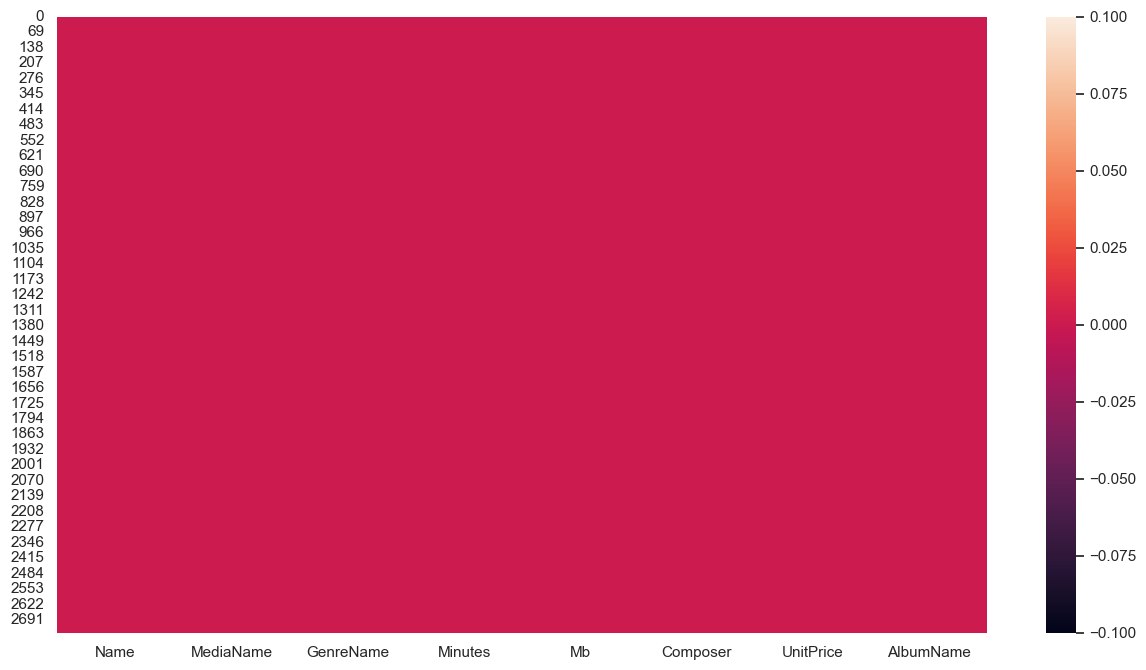

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.isnull())

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df["Composer"] = df.Composer.apply(lambda x: re.split(",|&", x))

In [ ]:
df

,Name,MediaName,GenreName,Minutes,Mb,Composer,UnitPrice,AlbumName
0,For Those About To Rock (We Salute You),MPEG audio file,Rock,5,11,"[Angus Young, Malcolm Young, Brian Johnson]",0.99,For Those About To Rock We Salute You
1,Balls to the Wall,Protected AAC audio file,Rock,5,5,[Unknown],0.99,Balls to the Wall
2,Fast As a Shark,Protected AAC audio file,Rock,3,3,"[F. Baltes, S. Kaufman, U. Dirkscneider , W...",0.99,Restless and Wild
3,Restless and Wild,Protected AAC audio file,Rock,4,4,"[F. Baltes, R.A. Smith-Diesel, S. Kaufman, ...",0.99,Restless and Wild
4,Princess of the Dawn,Protected AAC audio file,Rock,6,6,"[Deaffy , R.A. Smith-Diesel]",0.99,Restless and Wild
...,...,...,...,...,...,...,...,...
2744,"24 Caprices, Op. 1, No. 24, for Solo Violin, i...",Protected AAC audio file,Classical,4,4,[Niccolò Paganini],0.99,Great Recordings of the Century: Paganini's 24...
2745,"Erlkonig, D.328",Protected AAC audio file,Classical,4,4,[Unknown],0.99,Great Recordings of the Century - Shubert: Sch...
2746,"Concerto for Violin, Strings and Continuo in G...",Purchased AAC audio file,Classical,8,16,[Pietro Antonio Locatelli],0.99,"Locatelli: Concertos for Violin, Strings and C..."
2747,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Protected AAC audio file,Classical,4,4,[Unknown],0.99,Respighi:Pines of Rome
